In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# 1.讀取金融市場行銷數據Bank.csv檔案

In [2]:
df = pd.read_csv('Bank.csv')
df['loan'] = df['loan'].replace(['no','yes'],[0,1])
df['y'] = df['y'].replace(['no','yes'],[0,1])
df.describe()

,age,balance,loan,day,duration,campaign,pdays,previous,y
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,0.160226,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,0.366820,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,0.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,0.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,1.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


# 2.取出age、balance、duration、campaign、previous五個特徵、進行標準化

In [3]:
from sklearn.preprocessing import StandardScaler
#取出age、balance、duration、campaign、previous
newdf = df[['age','balance','duration','campaign','previous']]
#標準化
scaler = StandardScaler().fit(newdf)
df_std = scaler.transform(newdf)
#建立新的tab
df2 = pd.DataFrame(df_std, columns = ['age','balance','duration','campaign','previous'])
df2.describe()

#觀察age、balance
df3 = df2[["age","balance"]]

In [4]:
df3.describe()

,age,balance
count,4.521100e+04,4.521100e+04
mean,5.222844e-16,3.070663e-15
std,1.000011e+00,1.000011e+00
min,-2.159994e+00,-3.081149e+00
25%,-7.473845e-01,-4.237719e-01
50%,-1.823406e-01,-3.002800e-01
75%,6.652252e-01,2.158743e-02
max,5.091402e+00,3.309478e+01


# 3.k-means

## 3-1.決定集群數量

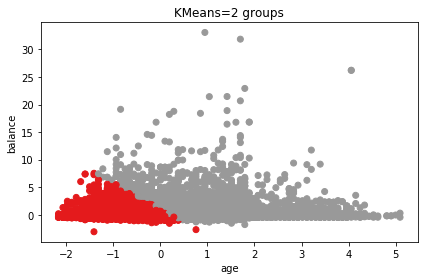

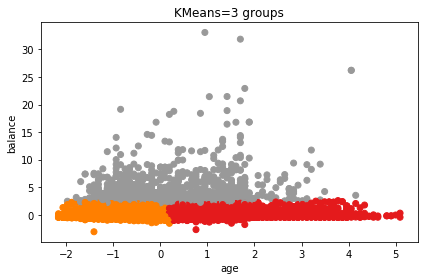

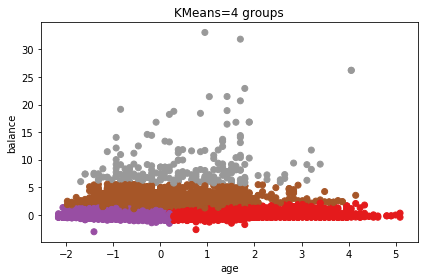

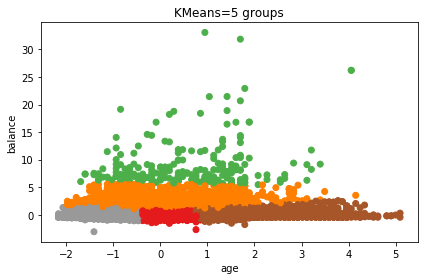

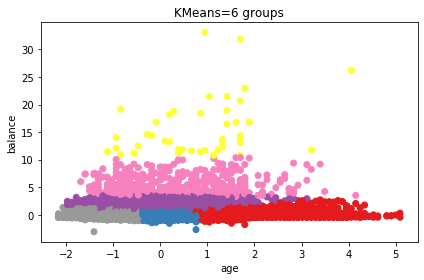

In [5]:
#散佈圖
for i in range(2,7):
    km_test = KMeans(n_clusters=i, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    plt.title('KMeans=%s groups'%(i))
    plt.scatter(df3["age"], df3["balance"], c=km_pred_test, cmap=plt.cm.Set1)
    plt.xlabel("age")
    plt.ylabel("balance")
    plt.tight_layout()
    plt.show()

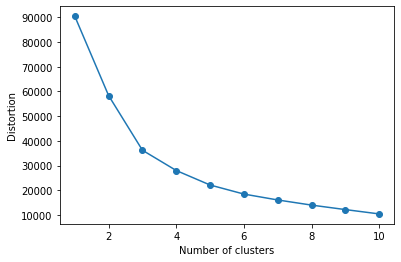

In [6]:
lst_dst = []

#轉折圖
for i in range(1, 11):
    km_test = KMeans(n_clusters=i,random_state=777)
    km_test.fit(df3)
    lst_dst.append(km_test.inertia_)

plt.plot(range(1, 11), lst_dst, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion');

In [ ]:
from sklearn.metrics import silhouette_score

#輪廓係數
for n_clusters in range(2,7):
    # 建立 k-means 模型並擬合數據
    km_test = KMeans(n_clusters=n_clusters, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    # 計算所有樣本的輪廓係數平均值
    silhouette_avg = silhouette_score(df3, km_pred_test)
    print("n_clusters =", n_clusters,
          "，所有樣本的輪廓係數平均 =", silhouette_avg)

In [ ]:
from sklearn.metrics.cluster import adjusted_rand_score

#調整蘭德指數
for n_clusters in range(2,7):
    # 建立 k-means 模型並擬合數據
    km_test = KMeans(n_clusters=n_clusters, random_state=777)
    km_pred_test = km_test.fit_predict(df3)
    # 計算所有樣本的輪廓係數平均值
    ARI = adjusted_rand_score(df["y"], km_pred_test)
    print("n_clusters =", n_clusters,
          "，調整蘭德指數 =", ARI)

## 3-2.以3-1決定的集群數量(4)進行分群

In [ ]:
#取n=4
km = KMeans(n_clusters=4, random_state=777)
km_pred = km.fit_predict(df3)

In [ ]:
import copy

#統計每個集群的大小
count = copy.deepcopy(df3)
count['cluster'] = km_pred
count['cluster'].value_counts()

In [ ]:
#長條圖
plt.barh(["0","1","2","3"], [km_c[0],km_c[1],km_c[2],km_c[3]], color=['red', 'green', 'blue', 'yellow'])
plt.yticks(["0","1","2","3"])
plt.ylabel('Clusters')
plt.xlabel('Count')
plt.title('Kmeans Clusters Count')
plt.show()